# HR-SALARY DASHBOARD-TRAIN THE DATA AND PREDICT SALARY

IMPORTING LIBRARY

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

LOAD THE DATA SET

In [3]:
hr_data=pd.read_csv('salarydata1.csv')

In [4]:
hr_data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
hr_data.tail()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [7]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [11]:
hr_data.shape

(32561, 14)

In [8]:
hr_data.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

WHILE ANALYSING THE DATA IT IS CLEAR THAT THE COLUMNS CAPITAL GAIN AND CAPITAL LOSS HAS NO IMPORTANCE IN SALARY PREDICTION. SO WE CAN DROP IT.
ALSO COLUMN EDUCATION NUM IS THE NUMERICAL VERSION OF THE COLUMN EDUCATION. SO WE CAN DROP THAT COLUMN TOO.

In [12]:
hr_data.drop(['capital-gain','capital-loss','education-num'], axis = 1,inplace = True)
hr_data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


# EDA

EDA of integer values

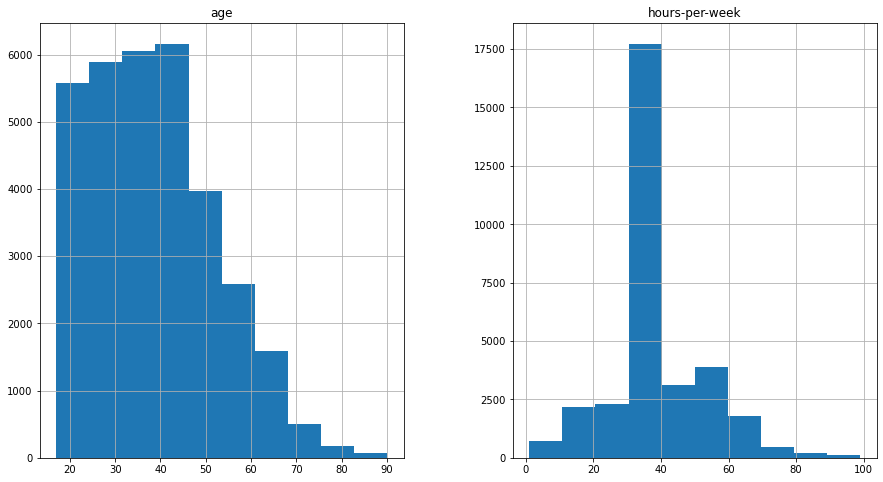

In [24]:
hr_data.hist(figsize=(15,8))
plt.show()

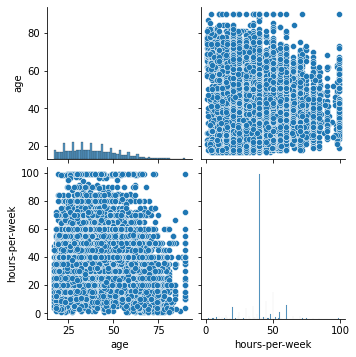

In [18]:
sns.pairplot(hr_data)
plt.show()

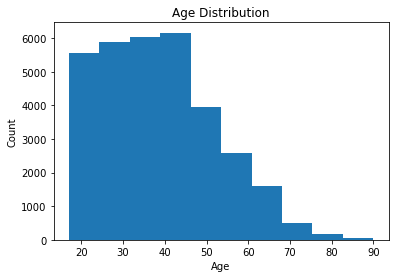

In [20]:
#We can check the above using some representations like graphs, barplots, etc

#checking age

plt.hist(hr_data['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

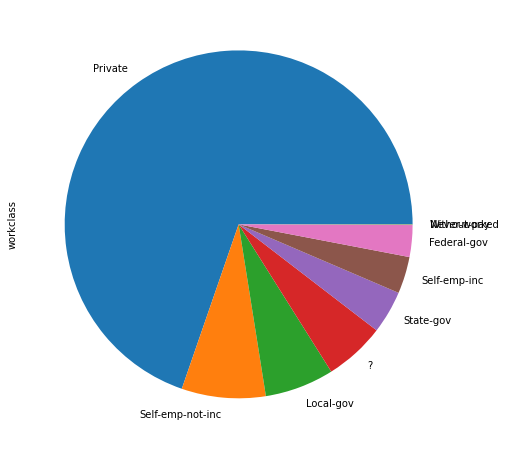

In [35]:
#checking workclass

hr_data['workclass'].value_counts().plot(kind = 'pie')
plt.show()

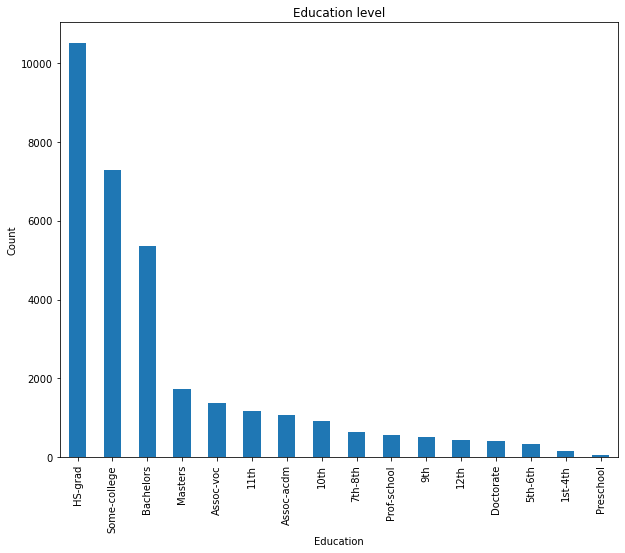

In [30]:
#checking education

hr_data['education'].value_counts().plot(kind = 'bar')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education level')
plt.show()

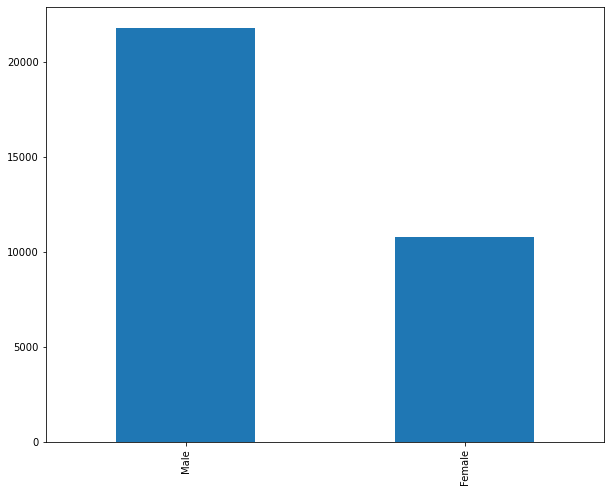

In [31]:
#checking sex

hr_data['sex'].value_counts().plot(kind = 'bar')
plt.show()

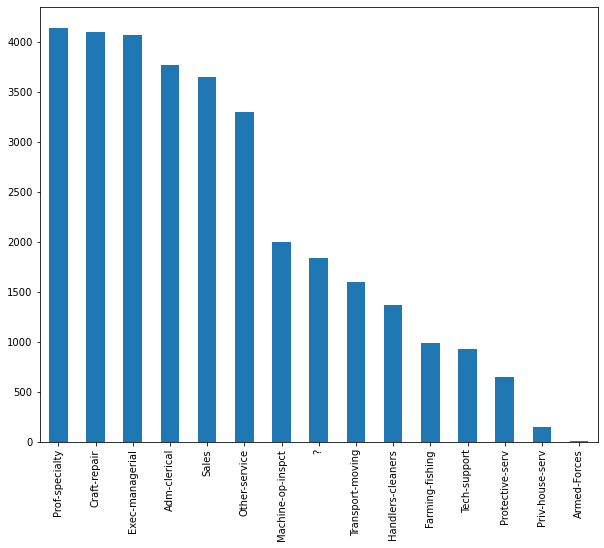

In [32]:
#checking occupation

hr_data['occupation'].value_counts().plot(kind = 'bar')
plt.show()
     


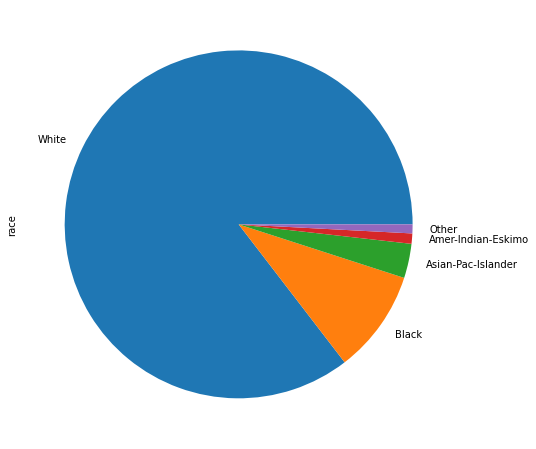

In [34]:
#Checking race

hr_data['race'].value_counts().plot(kind = 'pie')
plt.show()

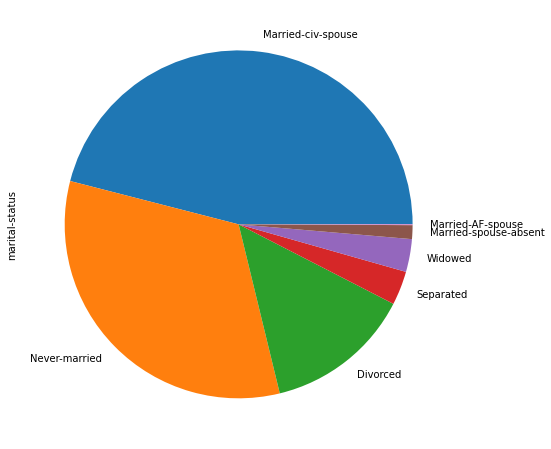

In [37]:
#checking marital-status

hr_data['marital-status'].value_counts().plot(kind = 'pie')
plt.show()

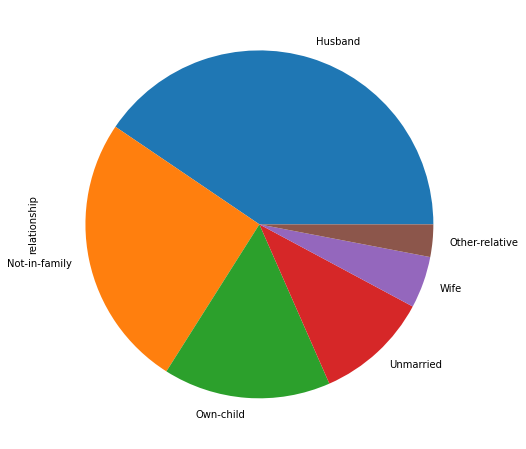

In [38]:
#checking relationship

hr_data['relationship'].value_counts().plot(kind = 'pie')
plt.show()

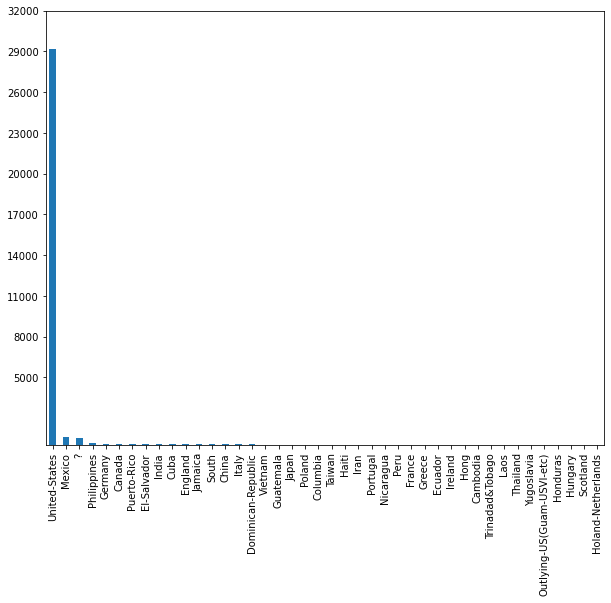

In [40]:
#checking native-country

hr_data['native-country'].value_counts().plot(kind = 'bar')
plt.yticks(np.arange(5000,33000,3000))
plt.show()

FOUND '?' IN COLUMNS NAMED OCCUPATION,NATIVE-COUNTRY AND WORKCLASS .USING MODE TO REMOVE THIS BECAUSE ALL THESE ARE OBJECT DATATYPES

REMOVING "?" FROM THE DATASET

In [42]:
hr_data["occupation"].mode()

0    Prof-specialty
Name: occupation, dtype: object

In [44]:
hr_data["workclass"].mode()

0    Private
Name: workclass, dtype: object

In [45]:
hr_data["native-country"].mode()

0    United-States
Name: native-country, dtype: object

In [46]:
hr_data['workclass'] = hr_data['workclass'].replace('?','Private')
hr_data['occupation']=hr_data['occupation'].replace('?','Prof-speciality')
hr_data['native-country']=hr_data['native-country'].replace('?','United-States')

In [47]:
hr_data[hr_data['salary']=='?']

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary


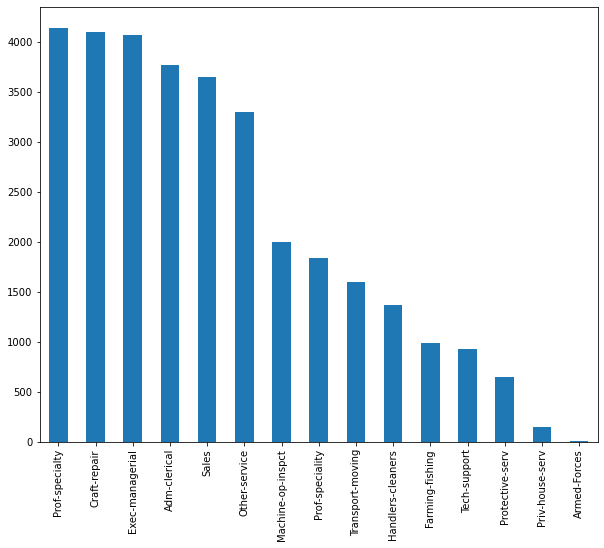

In [48]:
#checking whether the records that contains
#the question mark '?' have being removed

#checking occupation

hr_data['occupation'].value_counts().plot(kind = 'bar')
plt.show()
     

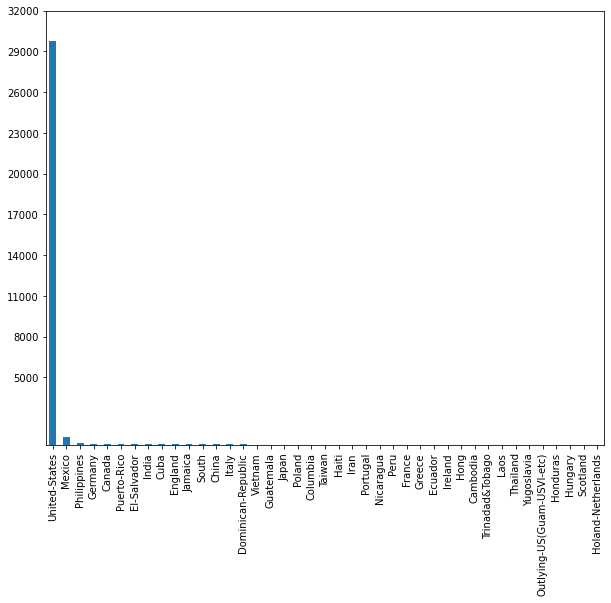

In [49]:
#checking native-country

hr_data['native-country'].value_counts().plot(kind = 'bar')
plt.yticks(np.arange(5000,33000,3000))
plt.show()
     

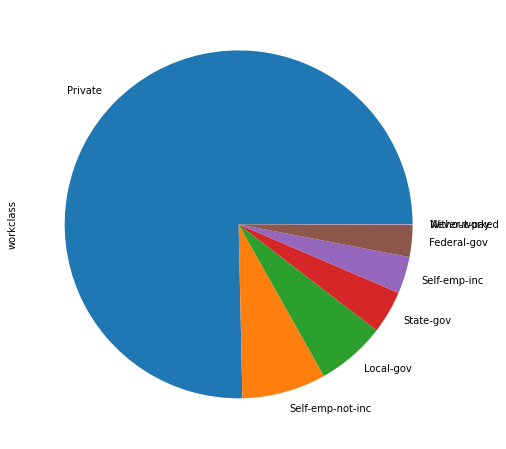

In [50]:
#checking workclass

hr_data['workclass'].value_counts().plot(kind = 'pie')
plt.show()
     

# FINDING OUTLIERS

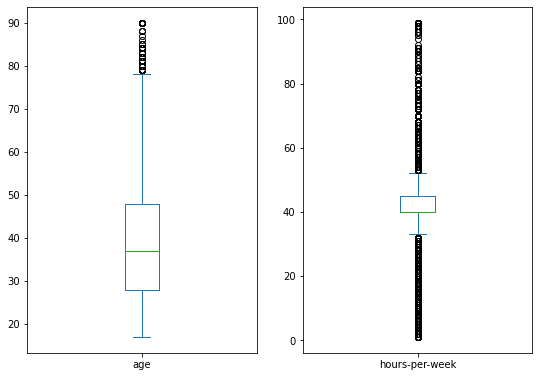

In [52]:
hr_data.plot(kind='box',subplots=True,layout=(2,3),figsize=(14,14));

In [78]:
#Outlier handling of age

Q1=np.percentile(hr_data['age'],25,interpolation='midpoint')
Q2=np.percentile(hr_data['age'],50,interpolation='midpoint')
Q3=np.percentile(hr_data['age'],75,interpolation='midpoint')
IQR=Q3-Q1
print(Q1,Q2,Q3)

28.0 37.0 48.0


In [79]:
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print('low_limit=',low_limit)
print('up_limit=',up_limit)

low_limit= -2.0
up_limit= 78.0


In [80]:
outlier=[]
for x in hr_data['age']:
  if((x>up_limit) or (x


SyntaxError: unexpected EOF while parsing (3792834153.py, line 3)

In [82]:
Ind1 = hr_data['age']>up_limit
location=hr_data.loc[Ind1].index

In [83]:
hr_data.drop(location,inplace=True)

Text(0.5, 1.0, 'Box plot of age after removing outliers')

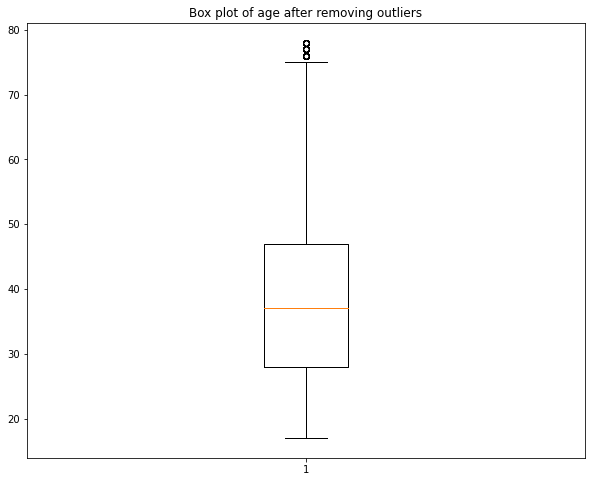

In [85]:
plt.boxplot(hr_data['age'])
plt.title("Box plot of age after removing outliers")

In [118]:
#Outlier handling of hours-per-week

Q1=np.percentile(hr_data['hours-per-week'],25,interpolation='midpoint')
Q2=np.percentile(hr_data['hours-per-week'],50,interpolation='midpoint')
Q3=np.percentile(hr_data['hours-per-week'],75,interpolation='midpoint')
IQR=Q3-Q1
print(Q1,Q2,Q3)

35.0 40.0 40.0


In [119]:
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print('low_limit=',low_limit)
print('up_limit=',up_limit)

low_limit= 27.5
up_limit= 47.5


In [120]:
outlier=[]
for x in data['hours-per-week']:
  if((x>up_limit) or (x

SyntaxError: unexpected EOF while parsing (1570153893.py, line 3)

In [121]:
Ind1 = hr_data['hours-per-week']>up_limit
location=hr_data.loc[Ind1].index

In [122]:
hr_data.drop(location,inplace=True)

Text(0.5, 1.0, 'Box plot of hours-per-week after removing outliers')

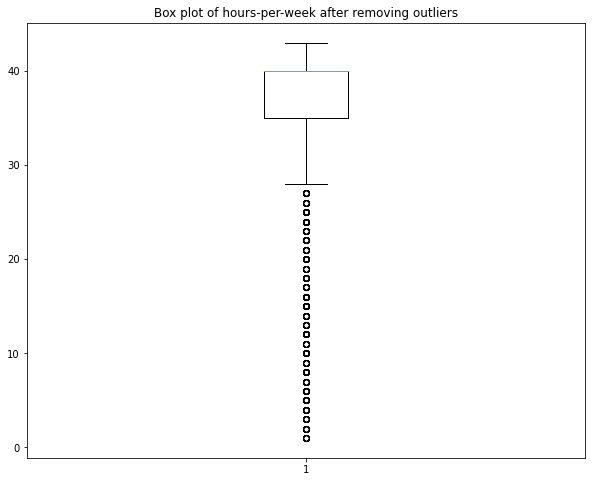

In [125]:
plt.boxplot(hr_data['hours-per-week'])
plt.title("Box plot of hours-per-week after removing outliers")

In [134]:
hr_data.shape

(23262, 11)

LabelEncoding

In [136]:
from sklearn import preprocessing 
label= preprocessing.LabelEncoder()  
hr_data['workclass']=label.fit_transform(hr_data['workclass'])
hr_data['education']=label.fit_transform(hr_data['education'])
hr_data['occupation']=label.fit_transform(hr_data['occupation'])
hr_data['sex']=label.fit_transform(hr_data['sex'])
hr_data['salary']=label.fit_transform(hr_data['salary'])
hr_data['race']=label.fit_transform(hr_data['race'])
hr_data['native-country']=label.fit_transform(hr_data['native-country'])
hr_data['marital-status']=label.fit_transform(hr_data['marital-status'])
hr_data['relationship']=label.fit_transform(hr_data['relationship'])

In [137]:
hr_data

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,6,9,4,0,1,4,1,40,38,0
1,50,5,9,2,3,0,4,1,13,38,0
2,38,3,11,0,5,1,4,1,40,38,0
3,53,3,1,2,5,0,2,1,40,38,0
4,28,3,9,2,10,5,2,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,7,2,13,5,4,0,38,38,0
32557,40,3,11,2,6,0,4,1,40,38,1
32558,58,3,11,6,0,4,4,0,40,38,0
32559,22,3,11,4,0,3,4,1,20,38,0


In [139]:
x=hr_data.drop(columns=['salary'],axis=1)
y=hr_data['salary']

In [140]:
x.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
0,39,6,9,4,0,1,4,1,40,38
1,50,5,9,2,3,0,4,1,13,38
2,38,3,11,0,5,1,4,1,40,38
3,53,3,1,2,5,0,2,1,40,38
4,28,3,9,2,10,5,2,0,40,4


In [141]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [142]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,precision_score,recall_score,classification_report

In [145]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(70,90)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [146]:
acc_values

[0.8373092628411777,
 0.8370943477326456,
 0.8383838383838383,
 0.8368794326241135,
 0.8370943477326456,
 0.8373092628411777,
 0.8379540081667741,
 0.8373092628411777,
 0.8373092628411777,
 0.8379540081667741,
 0.839458413926499,
 0.8388136686009027,
 0.8385987534923706,
 0.8401031592520954,
 0.8396733290350311,
 0.8401031592520954,
 0.8381689232753062,
 0.8396733290350311,
 0.8381689232753062,
 0.837739093058242]

Text(0, 0.5, 'accuracy')

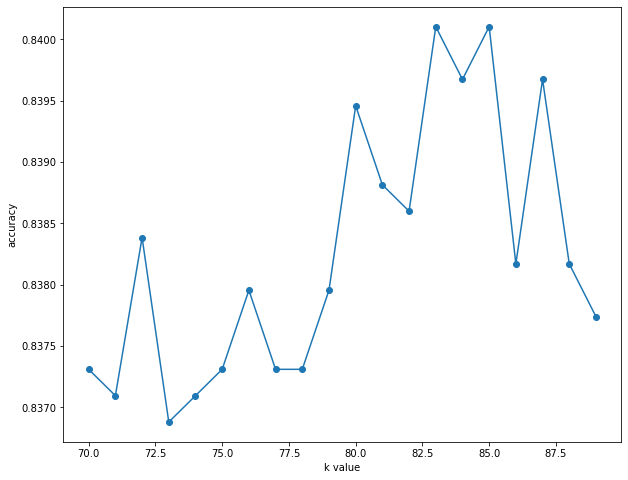

In [147]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [148]:
classifier=KNeighborsClassifier(n_neighbors=72, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)

StandardScaler

In [149]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

Min-Max Scaler

In [150]:
y=hr_data['salary']
x=hr_data.drop(['salary',],axis=1)

In [151]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [152]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
x_train=min_max.fit_transform(x_train)
x_test=min_max.fit_transform(x_test)

Normalization

In [153]:
y=hr_data['salary']
x=hr_data.drop(['salary',],axis=1)

In [154]:
x=preprocessing.normalize(x)

In [155]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [156]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,precision_score,recall_score,classification_report

LogisticRegression

In [158]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
ac_lr=accuracy_score(y_test,y_pred)

In [159]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.90      3839
           1       0.00      0.00      0.00       814

    accuracy                           0.83      4653
   macro avg       0.41      0.50      0.45      4653
weighted avg       0.68      0.83      0.75      4653



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN

In [160]:
classifier=KNeighborsClassifier(n_neighbors=72, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)
ac_knn=accuracy_score(y_test,y_pred)

In [161]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      3839
           1       0.57      0.31      0.40       814

    accuracy                           0.84      4653
   macro avg       0.72      0.63      0.65      4653
weighted avg       0.81      0.84      0.82      4653



Descision Tree

In [162]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
ac_dt=accuracy_score(y_test,y_pred)

In [163]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      3839
           1       0.47      0.45      0.46       814

    accuracy                           0.81      4653
   macro avg       0.68      0.67      0.67      4653
weighted avg       0.81      0.81      0.81      4653



RandomForest

In [165]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 50)
rf.fit(x_train,y_train)
y_predict = rf.predict(x_test)
ac_rf=accuracy_score(y_test,y_predict)

In [166]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      3839
           1       0.55      0.45      0.49       814

    accuracy                           0.84      4653
   macro avg       0.72      0.68      0.70      4653
weighted avg       0.83      0.84      0.83      4653



SVC

In [174]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
ac_svc=accuracy_score(y_test,y_pred)

In [175]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.90      3839
           1       0.00      0.00      0.00       814

    accuracy                           0.83      4653
   macro avg       0.41      0.50      0.45      4653
weighted avg       0.68      0.83      0.75      4653



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [176]:
print("The accuracy of Logistic Regression is:",ac_lr*100)
print("The accuracy of KNN is:",ac_knn*100)
print("The accuracy of Decision tree is:",ac_dt*100)
print("The accuracy of SVM is:",ac_svc*100)
print("The accuracy of Random forest  is:",ac_rf*100)

The accuracy of Logistic Regression is: 82.50591016548464
The accuracy of KNN is: 83.85987534923706
The accuracy of Decision tree is: 81.47431764453042
The accuracy of SVM is: 82.50591016548464
The accuracy of Random forest  is: 83.92434988179669


In [177]:
from tabulate import tabulate

In [178]:
table = [['Model', 'Accuracy'], ['Logistic Regression',ac_lr], ['KNN',ac_knn],['Decision tree',ac_dt],["SVM",ac_svc],['Random Forest',ac_rf]]
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒═════════════════════╤════════════╕
│ Model               │   Accuracy │
╞═════════════════════╪════════════╡
│ Logistic Regression │   0.825059 │
├─────────────────────┼────────────┤
│ KNN                 │   0.838599 │
├─────────────────────┼────────────┤
│ Decision tree       │   0.814743 │
├─────────────────────┼────────────┤
│ SVM                 │   0.825059 │
├─────────────────────┼────────────┤
│ Random Forest       │   0.839243 │
╘═════════════════════╧════════════╛


From the table, it is clear that Random forest have better accuracy compared to others.So Random forest is taken as our model to predict the salary.So we can tune this to check whether the performance is improving.

Hyper Parameter tuning of Random forest Classifier

In [179]:
rf=RandomForestClassifier(criterion='gini',max_depth=10,n_estimators=600)
rf.fit(x_train,y_train)
y_pr=rf.predict(x_test)
acc_sc=accuracy_score(y_test,y_pr)*100
acc_sc

85.96604341285192

Hyper parameter tuning improved the accuracy of Random forest modeling. So we can take random forest classifier to build our model.